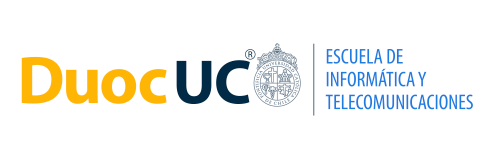

Integrantes:

*   Roberto Adasme
*   Leonardo Arriati
*   Maicol Ávila
*   Renato Saldivia

Docente:

*   Fabián Guajardo


# Business Understanding

Australia es un país extenso y diverso en términos de clima, con regiones que van desde desiertos áridos hasta zonas tropicales y costas templadas. La ciudad de Melbourne, ubicada en el estado de Victoria, es conocida por su clima variable y experimenta una amplia gama de condiciones climáticas a lo largo del año.

En este proyecto, nos centraremos en analizar los datos meteorológicos diarios de Melbourne para predecir si habrá lluvia al día siguiente. El objetivo es desarrollar un modelo de clasificación que pueda proporcionar una predicción precisa y confiable sobre la presencia de lluvia, utilizando variables como temperatura, humedad, dirección y velocidad del viento.

Las preguntas que buscamos responder son las siguientes:

*   ¿Cuáles son las ciudades de Australia que registran mayor cantidad de lluvia durante el período de estudio propuesto?
*   ¿Cuál es el top 3 de las ubicaciones con mayor y menor humedad respectivamente?
*   ¿Existe alguna relación entre la temperatura máxima y la humedad en Melbourne?

Para responder a estas preguntas, exploraremos los datos históricos de Melbourne y realizaremos análisis y visualizaciones gráficas que nos permitan comprender mejor los patrones y las tendencias climáticas en la región. Luego, construiremos modelos de regresión y clasificación utilizando técnicas de aprendizaje automático para predecir la presencia de lluvia en función de las variables meteorológicas diarias.

El resultado de este proyecto será un modelo predictivo que brinde información valiosa para la toma de decisiones en diversas áreas, como la planificación urbana, la gestión de recursos hídricos y la programación de eventos al aire libre.

A medida que avancemos en el proyecto, evaluaremos la precisión del modelo, realizaremos ajustes si es necesario y buscaremos optimizar su rendimiento. Además, nos centraremos en la interpretación de los resultados y en la comunicación efectiva de las predicciones a los usuarios finales.

Este proyecto tiene como objetivo proporcionar una herramienta útil para comprender y predecir el clima en Melbourne, lo que puede contribuir a una mejor planificación y toma de decisiones basadas en datos en diferentes sectores.

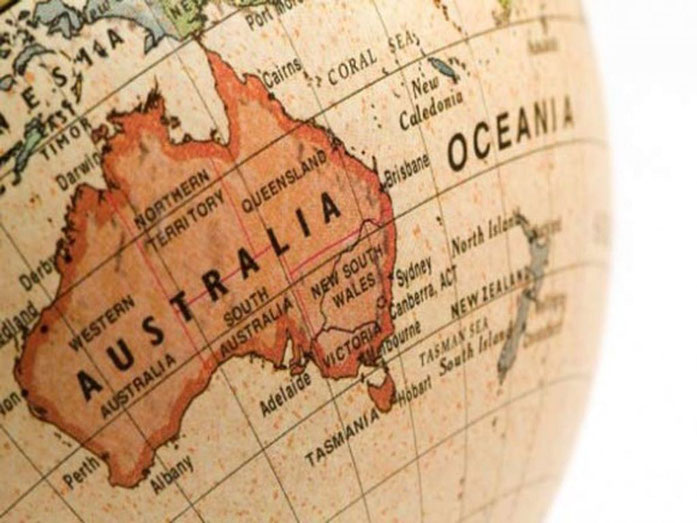

#Data Understanding

Esta segunda fase se encarga de la recolección de datos inicial a partir de las fuentes de información, en este caso, los datos meteorológicos de Australia.

Se comienza por la comprensión de su naturaleza y su significado, el análisis de calidad para reconocer su validez, la exploración inicial de los datos o de los subconjuntos de datos y el planteamiento de las primeras hipótesis sobre los mismos. El fin de este punto es detectar posibles errores o anomalías en el dataframe.

Los datos están contenidos en un archivo CSV y tiene un total de 24 variables y 142.193 registros.

In [ ]:
# Montar Google Drive en Colab
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
# Librerías utilizadas en el proyecto
import pandas as pd                               # manipulación y análisis de datos
import matplotlib.pyplot as plt                   # visualización de datos
from datetime import datetime                     # manipulación de fechas y horas
import seaborn as sns                             # visualizaciones estadísticas
from sklearn.preprocessing import OneHotEncoder   # codificar variables categóricas en formato One-Hot
from sklearn.preprocessing import LabelEncoder    # codificación de variables categóricas en números enteros
import numpy as np                                # operaciones numéricas eficientes en Python

# Crear dataframe a partir de un archivo CSV en Google Drive
url = "/content/drive/MyDrive/Mineria_de_datos/weatherAUS.csv"
df = pd.read_csv(url)


In [ ]:
# Mostrar todas las columnas
pd.set_option('display.max_columns', None)

# Llamada al dataframe
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,0.0,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,0.0,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,0.0,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,1.0,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,0.2,No


In [ ]:
# Número de filas (datos) por número de columnas (variables)
print(f"El dataframe tiene {df.shape[0]} filas y {df.shape[1]} columnas.")

El dataframe tiene 142193 filas y 24 columnas.


## Análisis estadístico y exploratorio del conjunto de datos

In [ ]:
# Resumen de información del conjunto de datos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142193 entries, 0 to 142192
Data columns (total 24 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           142193 non-null  object 
 1   Location       142193 non-null  object 
 2   MinTemp        141556 non-null  float64
 3   MaxTemp        141871 non-null  float64
 4   Rainfall       140787 non-null  float64
 5   Evaporation    81350 non-null   float64
 6   Sunshine       74377 non-null   float64
 7   WindGustDir    132863 non-null  object 
 8   WindGustSpeed  132923 non-null  float64
 9   WindDir9am     132180 non-null  object 
 10  WindDir3pm     138415 non-null  object 
 11  WindSpeed9am   140845 non-null  float64
 12  WindSpeed3pm   139563 non-null  float64
 13  Humidity9am    140419 non-null  float64
 14  Humidity3pm    138583 non-null  float64
 15  Pressure9am    128179 non-null  float64
 16  Pressure3pm    128212 non-null  float64
 17  Cloud9am       88536 non-null

El DataFrame muestra un total de 142.193 datos y 24 columnas (variables). Las columnas y su respectivo recuento de valores no nulos se muestran en el código anterior:

*   La columna "Date" tiene 142.193 valores no nulos y su tipo de dato es object (cadena de caracteres). Esto sugiere que representa fechas, pero es posible que se necesite convertir a un tipo de dato de fecha y tiempo para facilitar el análisis y la manipulación de fechas.
*   La columna "Location" también tiene 142.193 valores no nulos y su tipo de dato es object.
*   Las columnas "MinTemp", "MaxTemp", "Rainfall", "Evaporation", "Sunshine", "WindGustSpeed", "WindSpeed9am", "WindSpeed3pm", "Humidity9am", "Humidity3pm", "Pressure9am", "Pressure3pm", "Cloud9am", "Cloud3pm", "Temp9am" y "Temp3pm" son numéricas y tienen algunos valores faltantes. Sus tipos de dato son float64 (números de punto flotante de 64 bits), lo que representan mediciones de temperaturas, precipitaciones, velocidad del viento, humedad, presión, nubosidad y temperatura en diferentes momentos del día.
*   Las columnas "WindGustDir", "WindDir9am", "WindDir3pm", "RainToday" y "RainTomorrow" son de tipo object (cadena de caracteres) y también tienen algunos valores faltantes. Estas columnas contienen información sobre la dirección del viento, si llovió ese día ("RainToday") y si se espera lluvia al día siguiente ("RainTomorrow").
*   La columna "RISK_MM" tiene 142.193 valores no nulos y su tipo de dato es float64. Esta columna representa una medida de riesgo de lluvia en milímetros.











In [ ]:
# Este bloque de código muestra el resumen estadístico del dataframe
df.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,141556.000000,141871.000000,140787.000000,81350.000000,74377.000000,132923.000000,140845.000000,139563.000000,140419.000000,138583.000000,128179.000000,128212.000000,88536.000000,85099.000000,141289.000000,139467.000000,142193.000000
mean,12.186400,23.226784,2.349974,5.469824,7.624853,39.984292,14.001988,18.637576,68.843810,51.482606,1017.653758,1015.258204,4.437189,4.503167,16.987509,21.687235,2.360682
std,6.403283,7.117618,8.465173,4.188537,3.781525,13.588801,8.893337,8.803345,19.051293,20.797772,7.105476,7.036677,2.887016,2.720633,6.492838,6.937594,8.477969
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,0.000000
25%,7.600000,17.900000,0.000000,2.600000,4.900000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000,0.000000
50%,12.000000,22.600000,0.000000,4.800000,8.500000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,0.000000
75%,16.800000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000,0.800000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,9.000000,40.200000,46.700000,371.000000


A partir de los datos estadísticos previamente presentados, es posible identificar la siguiente información en relación a estas cinco variables:

1. MinTemp: La temperatura mínima promedio registrada es de 12.2°C, lo cual nos da una idea general de la temperatura mínima esperada en las observaciones. Sin embargo, es importante tener en cuenta que la desviación estándar de 6.4 grados indica que hay una variabilidad significativa en los valores de temperatura mínima, es decir, que hay observaciones que registran temperaturas mínimas más bajas o más altas que el promedio. Por ejemplo, la temperatura mínima más baja registrada es de -8.5 grados, lo cual puede ser considerado un valor atípico y merece una mayor exploración para entender las circunstancias que llevaron a ese registro. Por otro lado, el valor máximo registrado es de 33.9 grados, lo cual también es un valor atípico y puede ser indicativo de un clima extremadamente cálido o una condición inusual.
2. Rainfall: Según los datos obtenidos, se puede observar que el valor promedio de lluvia registrada es de 2.34 mm, lo que indica que en general no hay una gran cantidad de lluvia registrada. Sin embargo, la desviación estándar de 8.46 indica que los datos se encuentran dispersos en un rango amplio, lo que sugiere que en algunos días se pueden presentar precipitaciones intensas.
Además, al observar los percentiles, se puede notar que el 25% de los días no registran lluvia, y que el 50% y 75% de los días registran una cantidad muy baja de lluvia, de 0.0 mm y 0.8 mm respectivamente. Sin embargo, también se puede notar que existe un valor atípico muy alto, con un máximo de 371 mm, lo que sugiere que en algunos días se han presentado lluvias intensas que pueden afectar significativamente.
En conclusión, aunque la cantidad promedio de lluvia registrada es baja, la alta desviación estándar y el valor atípico máximo sugieren que la lluvia puede presentarse en la zona de manera impredecible y en cantidades significativas en algunos casos.
3.   Evaporation: La variable evaporación tiene una media de 5.47 mm, lo que indica que en promedio se evapora esa cantidad de agua por día. La desviación estándar de 4.18 mm indica que los valores tienden a dispersarse en torno a la media, pero no muy ampliamente, lo que sugiere que hay cierta consistencia en la evaporación diaria. El percentil 25 de 2.60 mm y el percentil 75 de 7.40 mm indican que el 50% de los días la evaporación estuvo entre 2.60 y 7.40 mm, mientras que el rango total de valores va desde un mínimo de 0 mm hasta un máximo de 145 mm, lo que sugiere que hubo algunos días con una evaporación inusualmente alta. En general, la variable evaporación parece tener cierta variabilidad en los valores, pero sin una dispersión muy amplia, lo que sugiere que es una variable importante pero relativamente estable.
4. WindSpeed3pm: Esta variable describe la velocidad del viento en kilómetros por hora a las 3pm. Según los datos del análisis descriptivo, la velocidad promedio del viento es de 18.6 km/h con una desviación estándar de 8.8 km/h. El valor mínimo de velocidad del viento es 0.0 km/h, lo que indica que en algunas ocasiones no hay viento a las 3pm. El valor máximo registrado es de 87.0 km/h, lo que indica que en algunas ocasiones se registraron vientos extremadamente fuertes en esta hora del día.
5. Humidity9am: Esta variable muestra que la humedad promedio a las 9 a.m. es del 68.8%, lo que sugiere que en general las mañanas son bastante húmedas. La desviación estándar de 19.1% indica que la humedad puede variar significativamente de un día a otro. El valor mínimo de 0.0% significa que ha habido días en los que la humedad ha sido prácticamente inexistente, mientras que el valor máximo de 100.0% indica que ha habido días extremadamente húmedos. Es importante tener en cuenta estos valores extremos, ya que una humedad excesiva puede tener efectos negativos en la salud humana y el medio ambiente. Además, el análisis de la distribución de la humedad a las 9 a.m. podría ser relevante para planificar actividades al aire libre, como deportes o trabajos agrícolas.











## Tendencias y distribuciones de los datos

### Gráfico 1

<ipython-input-7-44d6a18b7a81>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_melbourne['Date'] = pd.to_datetime(df_melbourne['Date'])
<ipython-input-7-44d6a18b7a81>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1.sort_values('Date', inplace=True)


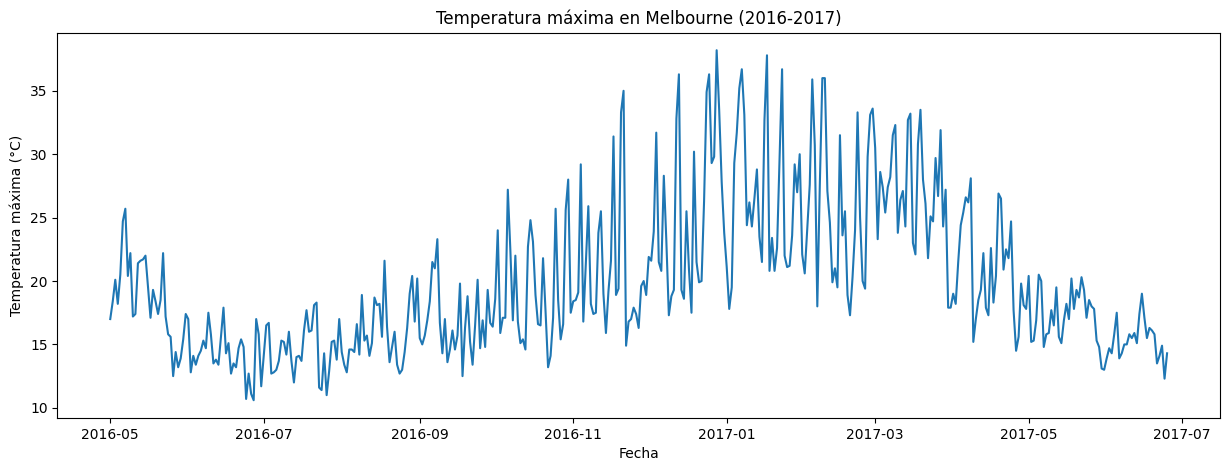

La temperatura máxima de 38.2 grados en Melbourne fue registrada el 28/12/2016
La temperatura mínima de entre los valores máximos registrados en Melbourne fue de 10.6 grados registrada el 27/06/2016


In [ ]:
# Filtrar los datos solo para la ciudad de Melbourne
df_melbourne = df[df['Location'] == 'Melbourne']

# Convertir la columna de fecha al formato de fecha y hora
df_melbourne['Date'] = pd.to_datetime(df_melbourne['Date'])

# Filtrar los datos por el rango de fechas deseado
df1 = df_melbourne.loc[(df_melbourne['Date'].dt.year >= 2016) & (df_melbourne['Date'].dt.year <= 2017)]

# Ordenar los datos por fecha ascendente
df1.sort_values('Date', inplace=True)

# Crear la figura y los ejes con un ancho de 15 pulgadas y un alto de 5 pulgadas
fig, ax = plt.subplots(figsize=(15, 5))

# Graficar los datos de temperatura máxima
plt.plot(df1["Date"], df1["MaxTemp"])

# Obtener la temperatura máxima y mínima
max_temp = df1["MaxTemp"].max()
min_temp = df1["MaxTemp"].min()

# Obtener la fecha de la temperatura máxima y mínima
max_date = df1.loc[df1["MaxTemp"] == max_temp, "Date"].values[0]
min_date = df1.loc[df1["MaxTemp"] == min_temp, "Date"].values[0]

# Convertir a datetime
max_date = datetime.utcfromtimestamp(max_date.astype(int) * 1e-9)
min_date = datetime.utcfromtimestamp(min_date.astype(int) * 1e-9)

# Formatear la fecha
max_date_str = max_date.strftime('%d/%m/%Y')
min_date_str = min_date.strftime('%d/%m/%Y')

# Añadir un título y etiquetas a los ejes
ax.set_title('Temperatura máxima en Melbourne (2016-2017)')
ax.set_xlabel('Fecha')
ax.set_ylabel('Temperatura máxima (°C)')

# Mostrar el gráfico
plt.show()

# Imprimir la temperatura máxima y mínima con la fecha
print(f"La temperatura máxima de {max_temp} grados en Melbourne fue registrada el {max_date_str}")
print(f"La temperatura mínima de entre los valores máximos registrados en Melbourne fue de {min_temp} grados registrada el {min_date_str}")


El gráfico muestra la tendencia de la temperatura máxima en Melbourne durante el periodo comprendido entre el 1 de enero de 2016 y el 31 de diciembre de 2017. La línea trazada representa la variación de la temperatura máxima a lo largo del tiempo.

La temperatura máxima alcanzó su punto más alto el 28 de diciembre de 2016, registrando un valor de 38.2 grados Celsius. Este dato resalta un día excepcionalmente caluroso en Melbourne durante ese periodo.

Por otro lado, se observa que la temperatura máxima más baja entre los valores registrados fue de 10.6 grados Celsius, y esto ocurrió el 27 de junio de 2016. Este valor indica un día relativamente más fresco en comparación con el resto de los días analizados.

### Gráfico 2

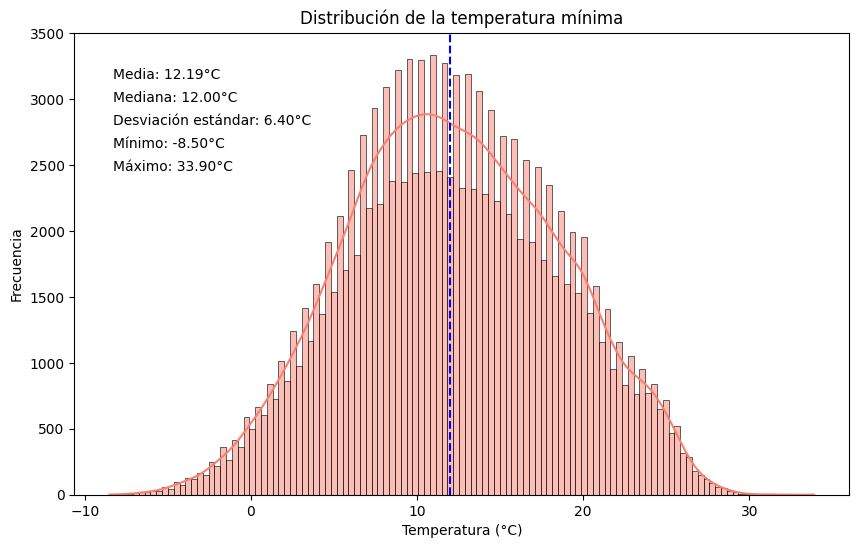

In [ ]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(10,6))

# Generar el histograma con la densidad
sns.histplot(df['MinTemp'], kde=True, color='salmon')

# Calcular estadísticas descriptivas
mean_temp = df['MinTemp'].mean()
median_temp = df['MinTemp'].median()
std_temp = df['MinTemp'].std()
min_temp = df['MinTemp'].min()
max_temp = df['MinTemp'].max()

# Anotar las estadísticas descriptivas en el gráfico
plt.text(0.05, 0.9, f"Media: {mean_temp:.2f}°C", transform=plt.gca().transAxes)
plt.text(0.05, 0.85, f"Mediana: {median_temp:.2f}°C", transform=plt.gca().transAxes)
plt.text(0.05, 0.8, f"Desviación estándar: {std_temp:.2f}°C", transform=plt.gca().transAxes)
plt.text(0.05, 0.75, f"Mínimo: {min_temp:.2f}°C", transform=plt.gca().transAxes)
plt.text(0.05, 0.7, f"Máximo: {max_temp:.2f}°C", transform=plt.gca().transAxes)

# Agregar título y etiquetas de los ejes
plt.axvline(x=median_temp, color='blue', linestyle='--', label='Mediana')
plt.title('Distribución de la temperatura mínima')
plt.xlabel('Temperatura (°C)')
plt.ylabel('Frecuencia')

# Mostrar gráfico
plt.show()



En el gráfico se puede observar que la temperatura mínima tiene una distribución aproximadamente simétrica alrededor de los 12.19°C, que corresponde a la media de los datos. La mediana, que es el valor que separa la mitad izquerda y la mitad derecha de los datos, es de 12.00°C, lo que sugiere que la distribución no está muy sesgada.

La desviación estándar de 6.40°C indica que los datos tienden a variar alrededor de la media en promedio, lo que implica cierta dispersión en las temperaturas mínimas registradas.

El rango de las temperaturas mínimas se extiende desde -8.50°C hasta 33.90°C, lo que muestra la amplitud de las variaciones de temperatura en el conjunto de datos.

### Gráfico 3

<ipython-input-9-2f076daa92e8>:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['WindGustSpeed'], shade=True, color='salmon')


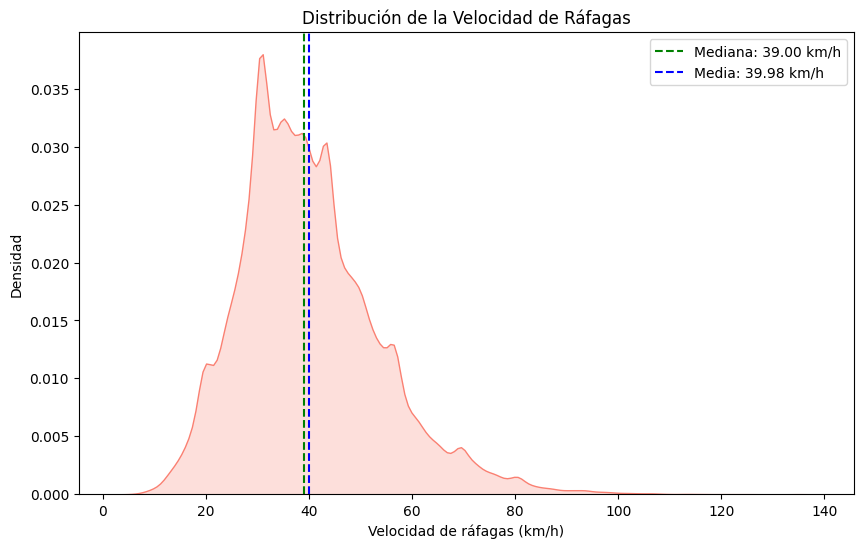

In [ ]:
# Configurar el tamaño del gráfico
plt.figure(figsize=(10, 6))

# Generar el gráfico KDE con sombreado
sns.kdeplot(df['WindGustSpeed'], shade=True, color='salmon')

# Calcular la mediana y la media de la velocidad de ráfagas
median_speed = df['WindGustSpeed'].median()
mean_speed = df['WindGustSpeed'].mean()

# Agregar línea vertical para la mediana
plt.axvline(x=median_speed, color='green', linestyle='--', label=f'Mediana: {median_speed:.2f} km/h')

# Agregar línea vertical para la media
plt.axvline(x=mean_speed, color='blue', linestyle='--', label=f'Media: {mean_speed:.2f} km/h')

# Agregar leyenda
plt.legend()

# Agregar título y etiquetas de los ejes
plt.title('Distribución de la Velocidad de Ráfagas')
plt.xlabel('Velocidad de ráfagas (km/h)')
plt.ylabel('Densidad')

# Mostrar gráfico
plt.show()


La gráfica muestra la distribución de la velocidad de ráfagas en kilómetros por hora (km/h).

La línea vertical de color verde representa la mediana de la velocidad de ráfagas, que es de 39.00 km/h. Esto significa que el 50% de las mediciones de velocidad de ráfagas se encuentran por debajo de este valor y el otro 50% se encuentran por encima.

La línea vertical de color azul representa la media de la velocidad de ráfagas, que es de 39.98 km/h. La media es el promedio de todas las mediciones de velocidad de ráfagas y puede verse afectada por valores extremos o atípicos.

Al tener la mediana y la media cercanas en valor, sugiere que la distribución de la velocidad de ráfagas es aproximadamente simétrica y no está sesgada hacia un extremo. Esto indica que no hay valores extremadamente altos o bajos que afecten significativamente el promedio.

## Agrupaciones / Hallazgos en el Análisis Exploratorio:

### Gráfico 1

¿Cuáles son las ciudades de Australia que más registro de lluvia caída tiene en el periodo propuesto?

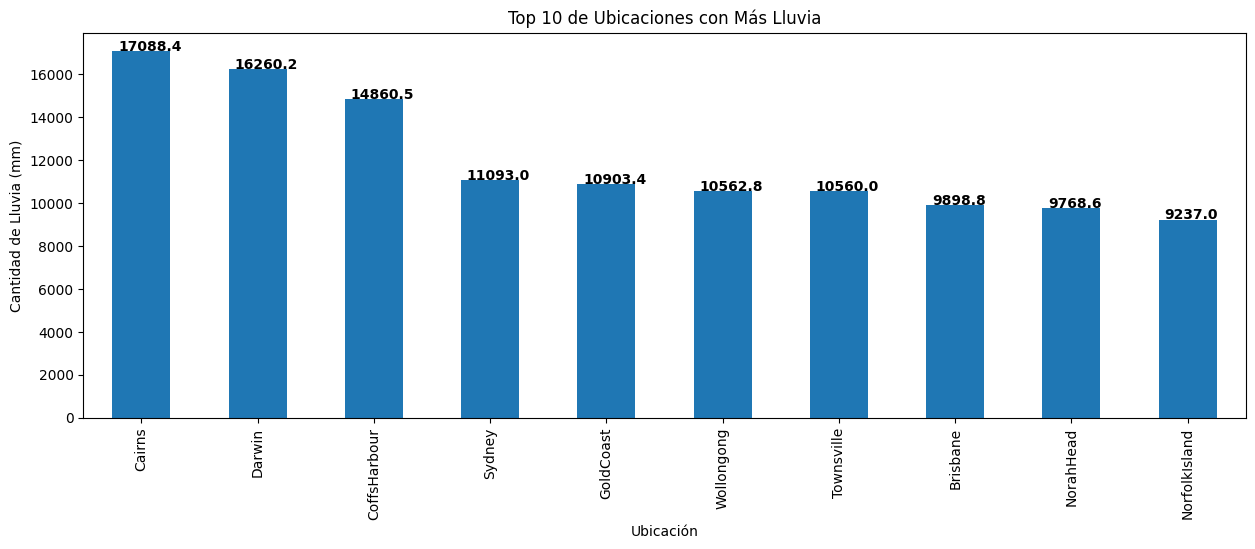

In [ ]:
# Calcular la cantidad total de lluvia por ubicación
df_rain = df.groupby("Location")["Rainfall"].sum()
import matplotlib.ticker as ticker

# Ordenar las ubicaciones por cantidad de lluvia y seleccionar las 10 primeras
df_rain_top10 = df_rain.sort_values(ascending=False).head(10)

# Crear un gráfico de barras de las 10 ubicaciones con más lluvia
fig, ax = plt.subplots(figsize=(15, 5))
df_rain_top10.plot(kind="bar")

# Establecer el formateador de ejes y para mostrar los valores como enteros
ax.yaxis.set_major_formatter(ticker.FormatStrFormatter("%d"))

# Añadir etiquetas al gráfico
plt.title("Top 10 de Ubicaciones con Más Lluvia")
plt.xlabel("Ubicación")
plt.ylabel("Cantidad de Lluvia (mm)")

# Agregar etiquetas con la cantidad de lluvia encima de cada barra
for i, v in enumerate(df_rain_top10):
    ax.text(i-0.2, v+10, str(v), color='black', fontweight='bold')

# Mostrar el gráfico
plt.show()


Con el gráfico de barras generado a partir del código proporcionado, podemos analizar la cantidad total de lluvia por ubicación y ver las 10 ubicaciones con mayor cantidad de lluvia. Este análisis puede ser útil para identificar patrones de lluvia y para la toma de decisiones en áreas como la agricultura, la gestión de recursos hídricos y la planificación urbana.

Por ejemplo, si una de las ubicaciones en el gráfico muestra una cantidad extremadamente alta de lluvia en comparación con las demás, esto puede indicar un problema de inundación o de drenaje. Por otro lado, si una ubicación muestra una cantidad extremadamente baja de lluvia, puede ser una señal para reconsiderar la viabilidad de ciertos cultivos o actividades que requieren mucha agua.

En general, el análisis de la cantidad de lluvia por ubicación puede ayudar en la toma de decisiones informadas en varios campos. Por ejemplo, puede ser útil para planificar la siembra de cultivos y para la gestión de recursos hídricos. Además, puede ayudar en la toma de decisiones en cuanto a la planificación urbana y la gestión de infraestructuras.

### Gráfico 2

¿Cuál es el top 3 de las ubicaciones con mayor y menor humedad respectivamente?

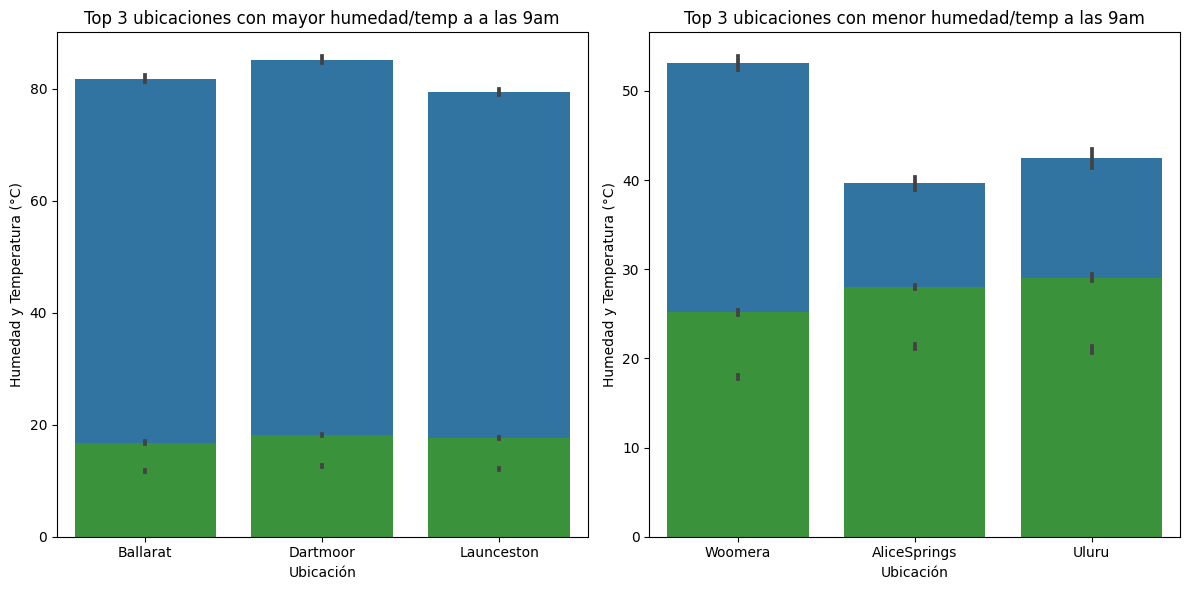

In [ ]:

# Obtener las top 3 ubicaciones con más y menos humedad a las 9am
humid_9am = df.groupby('Location')['Humidity9am'].mean()
humid_9am_top3 = humid_9am.sort_values(ascending=False)[:3] #Manera de mayor a menor
humid_9am_bot3 = humid_9am.sort_values(ascending=True)[:3]  #De menor a mayor

# Crear un dataframe con solo las top 3 y bottom 3 ubicaciones
df2_top3 = df.loc[df['Location'].isin(humid_9am_top3.index)]
df2_bot3 = df.loc[df['Location'].isin(humid_9am_bot3.index)]

# Crear un gráfico de barras para las top 3 ubicaciones con mayor humedad a las 9am y 3pm
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12, 6), gridspec_kw={"width_ratios": [1, 1]})

sns.barplot(data=df2_top3, x='Location', y='Humidity9am', color='#1f77b4', ax=axes[0])
sns.barplot(data=df2_top3, x='Location', y='Temp9am', color='#ff7f0e', ax=axes[0])
sns.barplot(data=df2_top3, x='Location', y='Temp3pm', color='#2ca02c', ax=axes[0])
axes[0].set_title('Top 3 ubicaciones con mayor humedad/temp a a las 9am')
axes[0].set_xlabel('Ubicación')
axes[0].set_ylabel('Humedad y Temperatura (°C)')

sns.barplot(data=df2_bot3, x='Location', y='Humidity9am', color='#1f77b4', ax=axes[1])
sns.barplot(data=df2_bot3, x='Location', y='Temp9am', color='#ff7f0e', ax=axes[1])
sns.barplot(data=df2_bot3, x='Location', y='Temp3pm', color='#2ca02c', ax=axes[1])
axes[1].set_title('Top 3 ubicaciones con menor humedad/temp a las 9am')
axes[1].set_xlabel('Ubicación')
axes[1].set_ylabel('Humedad y Temperatura (°C)')

plt.tight_layout()
plt.show()

 El análisis realizado al identificar las ubicaciones con mayor y menor humedad puede ser el punto de partida para investigar más a fondo las causas y consecuencias de ciertos patrones climáticos. Algunas posibles líneas de investigación podrían ser:

*   ¿Cuáles son los factores geográficos, ambientales y/o humanos que explican las diferencias en la humedad entre las diferentes ubicaciones? Por ejemplo, la distancia al mar, la altitud, la presencia de cuerpos de agua o bosques, la actividad humana, entre otros factores.
*   ¿Cómo afecta la humedad del aire a la salud y el bienestar humano? Por ejemplo, la exposición prolongada a ambientes muy secos o muy húmedos puede tener efectos negativos en la piel, las vías respiratorias, el sistema cardiovascular, entre otros sistemas del cuerpo.
*   ¿Cómo afecta la humedad del aire a los ecosistemas y la biodiversidad? Por ejemplo, la disponibilidad de agua para las plantas, los animales, los microorganismos, o alteraciones de los patrones de crecimiento, reproducción y migración de las especies.

Tambien los gráficos que creamos previamente, parece haber una relación inversa entre la temperatura y la humedad. Las ubicaciones con las temperaturas más altas tienden a tener una humedad más baja, mientras que las ubicaciones con las temperaturas más bajas tienden a tener una humedad más alta. Esto puede deberse a varios factores, como la geografía, la altitud y la cantidad de vegetación en la zona. Sin embargo, es importante tener en cuenta que esta relación no necesariamente se aplica a todas las ubicaciones y que puede haber otros factores que influyen en la humedad.








Este análisis permite identificar las ubicaciones con mayor cantidad de lluvia en el conjunto de datos, lo que puede ser útil para tomar decisiones en relación a la planificación y gestión de recursos para eventos climáticos extremos.

### Gráfico 3

¿Cuál es la relación entre la temperatura máxima y la humedad en Melbourne?

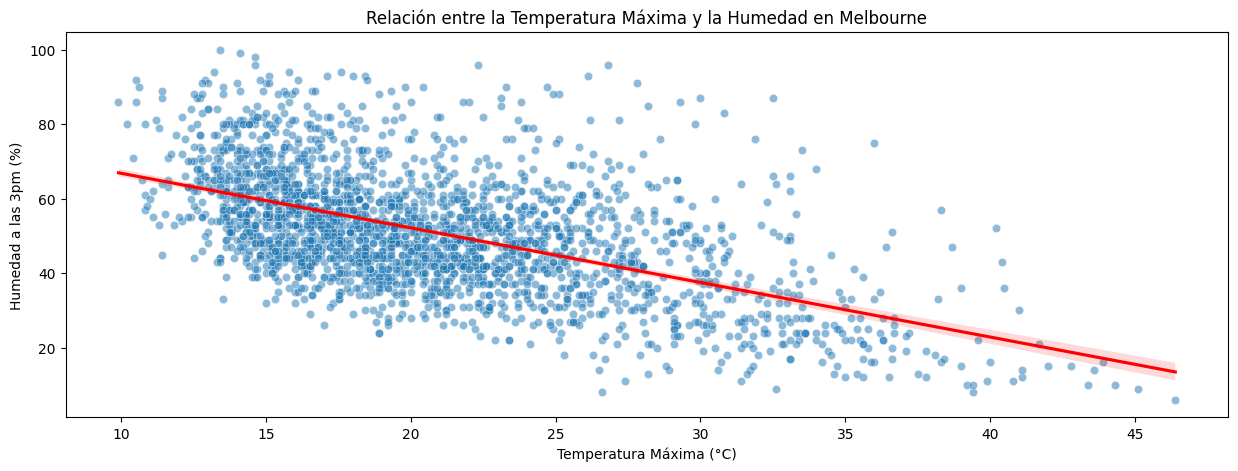

In [ ]:
# Filtrar los datos por ubicación (Melbourne)
df_location = df.loc[df['Location'] == 'Melbourne']

# Crear un gráfico de dispersión de la temperatura máxima y la humedad
fig, ax = plt.subplots(figsize=(15, 5))
sns.scatterplot(x="MaxTemp", y="Humidity3pm", data=df_location, alpha=0.5)

# Agregar una línea de regresión
sns.regplot(x="MaxTemp", y="Humidity3pm", data=df_location, scatter=False, color='red')

# Añadir etiquetas al gráfico
plt.title("Relación entre la Temperatura Máxima y la Humedad en Melbourne")
plt.xlabel("Temperatura Máxima (°C)")
plt.ylabel("Humedad a las 3pm (%)")

# Mostrar el gráfico
plt.show()

El gráfico muestra la relación entre la temperatura máxima y la humedad a las 3pm en Melbourne, y la línea de regresión resalta esta relación. La pendiente negativa de la línea de regresión indica que hay una relación inversa entre ambas variables.

Cuando se observan los puntos dispersos en el gráfico, podemos notar que a medida que la temperatura máxima aumenta, la humedad a las 3pm tiende a disminuir. Esto significa que en días más cálidos, es probable que la humedad sea menor.

La línea de regresión traza la tendencia general de la relación inversa entre la temperatura máxima y la humedad. Al ser una pendiente negativa, nos indica que cuando la temperatura máxima aumenta, la humedad a las 3pm tiende a disminuir de manera consistente.

## Mapa de calor de correlación

<ipython-input-13-46c650ff15db>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_df = df.corr(method='pearson')


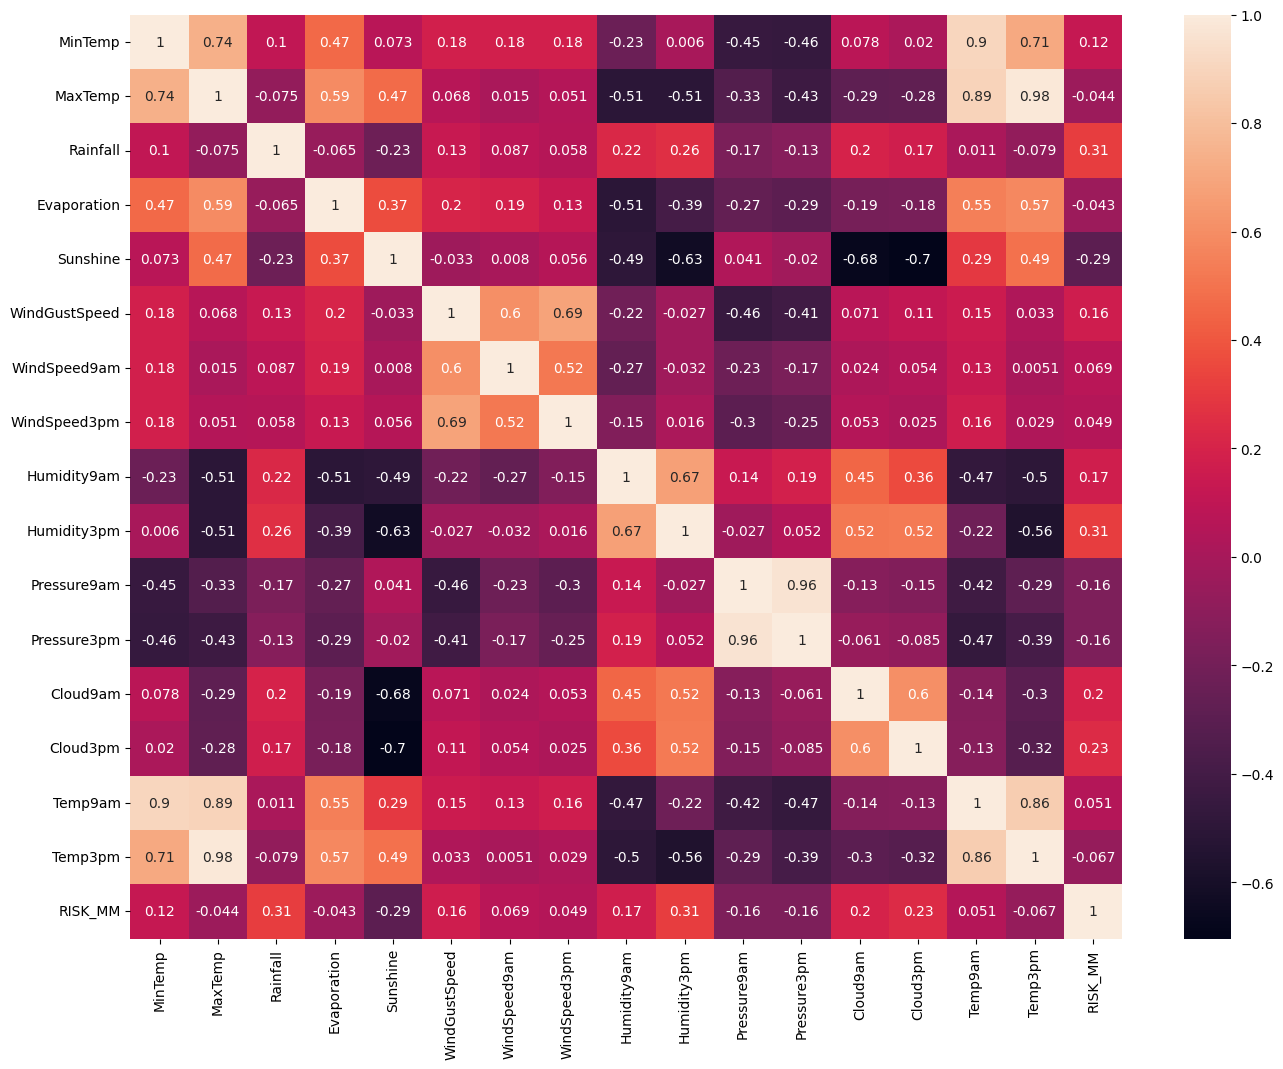

In [ ]:
# Mapa de calor
corr_df = df.corr(method='pearson')

plt.figure(figsize=(16, 12))
sns.heatmap(corr_df, annot=True)
plt.show()

El mapa de calor muestra la matriz de correlación entre las variables numéricas del conjunto de datos. La diagonal principal muestra la correlación de cada variable consigo misma, lo que siempre será 1. Los cuadros de color más oscuro indican una correlación negativa, mientras que los más claros indican una correlación positiva.

En este caso, podemos observar que la temperatura máxima y la temperatura mínima tienen una alta correlación positiva entre sí, lo que es de esperarse. También podemos observar que la humedad a las 3pm tiene una correlación negativa moderada con la temperatura máxima y la temperatura mínima, lo que significa que a medida que aumenta la temperatura, la humedad disminuye. Además, la velocidad de las ráfagas de viento tiene una correlación moderada con la temperatura máxima y mínima, lo que podría ser útil para predecir el clima en base a las ráfagas de viento.

En general, este análisis ayuda a entender cómo están relacionadas las variables en el conjunto de datos y a identificar patrones y tendencias que podrían ser útiles para futuros análisis o modelos predictivos.

#Data Preparation

Posterior a la validación de los datos contenidos en la información entregada, pasamos al proceso de preparación de los datos, donde se separan los datos que no son importantes, como los outliers que son valores atípicos y están por fuera de los parámetros normales de operación y son organizados en una sola estructura que va a ser utilizada como base de los análisis.

## Limpieza n°1: Detección de outliers

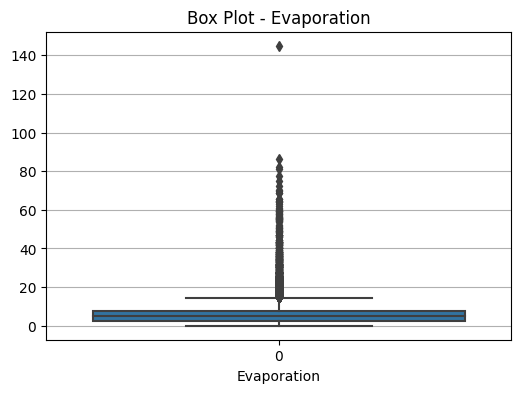

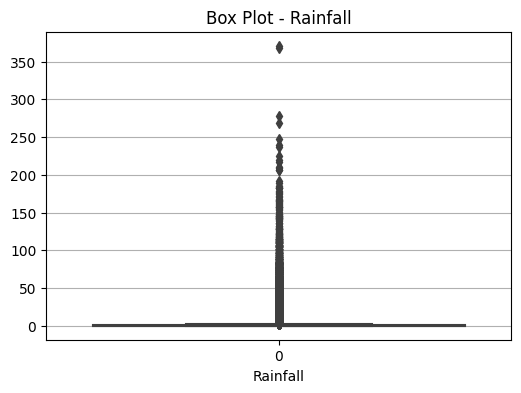

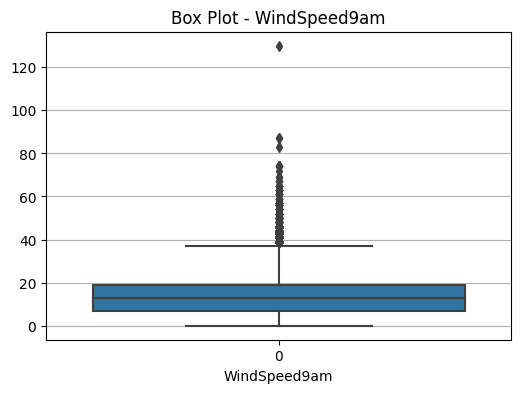

In [ ]:
# Variables numéricas en tu conjunto de datos
numeric_cols = ['Evaporation', 'Rainfall', 'WindSpeed9am']

# Crear un gráfico de caja para cada variable numérica
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    plt.grid(True)
    sns.boxplot(data=df[col])
    plt.xlabel(col)
    plt.title('Box Plot - ' + col)
    plt.show()

En el código anterior se ejecutaron tres gráficos de boxplot o diagrama de cajas el cuál permite mostrar valores outliers o atípicos.

En primera instancia se ejecutaron todas las columnas para mostrar las variables con valores atípicos, sin embargo, se descartó colocarlas debido a la masividad de la respuesta del código al tener que mostrar cada una de las columnas, así que se decidió por mostrar las variables de Evaporation, Rainfall y WindSpeed9am debido a que son las que efectivamente tienen valores outliers como se pueden observar en cada gráfico.

In [ ]:
# Identificación de outliers en la variable 'Evaporation' con valores superiores a 140
outliers_evaporation = df[df['Evaporation'] > 140]['Evaporation']
print("Outliers en la variable 'Evaporation':")
print(outliers_evaporation)
print()

# Identificación de outliers en la variable 'Rainfall' con valores superiores a 350
outliers_rainfall = df[df['Rainfall'] > 350]['Rainfall']
print("Outliers en la variable 'Rainfall':")
print(outliers_rainfall)
print()

# Identificación de outliers en la variable 'WindSpeed9am' con valores superiores a 120
outliers_windspeed9am = df[df['WindSpeed9am'] > 120]['WindSpeed9am']
print("Outliers en la variable 'WindSpeed9am':")
print(outliers_windspeed9am)
print()


Outliers en la variable 'Evaporation':
41185    145.0
Name: Evaporation, dtype: float64

Outliers en la variable 'Rainfall':
9236      371.0
136881    367.6
Name: Rainfall, dtype: float64

Outliers en la variable 'WindSpeed9am':
17540    130.0
Name: WindSpeed9am, dtype: float64



En el código anterior se visualizan los valores outliers que hay por cada variable. Como son pocas en comparación a la cantidad total de datos, se decidió ejecutar los siguientes códigos para cada columna con el fin de eliminar estos outliers a través del siguiente código:

In [ ]:
# Identificar el índice del valor outlier en la columna "Evaporation"
outlier_index = df[df['Evaporation'] > 140].index

# Eliminar el outlier del dataframe
df = df.drop(outlier_index, axis=0)

In [ ]:
# Identificar el índice del valor outlier en la columna "Rainfall"
outlier_index = df[df['Rainfall'] > 350].index

# Eliminar el outlier del dataframe
df = df.drop(outlier_index, axis=0)

In [ ]:
# Identificar el índice del valor outlier en la columna "WindSpeed9am"
outlier_index = df[df['WindSpeed9am'] > 120].index

# Eliminar el outlier del dataframe
df = df.drop(outlier_index, axis=0)

## Limpieza n°2: Tratamiento de datos faltantes

In [ ]:
# Total de valores nulos por columnas
for col in df.columns:
    nulos = df[col].isna().sum()
    if nulos > 0:
        print("Total de valores nulos en la columna", col, "=", nulos)

Total de valores nulos en la columna MinTemp = 637
Total de valores nulos en la columna MaxTemp = 322
Total de valores nulos en la columna Rainfall = 1406
Total de valores nulos en la columna Evaporation = 60840
Total de valores nulos en la columna Sunshine = 67814
Total de valores nulos en la columna WindGustDir = 9327
Total de valores nulos en la columna WindGustSpeed = 9267
Total de valores nulos en la columna WindDir9am = 10012
Total de valores nulos en la columna WindDir3pm = 3777
Total de valores nulos en la columna WindSpeed9am = 1347
Total de valores nulos en la columna WindSpeed3pm = 2629
Total de valores nulos en la columna Humidity9am = 1774
Total de valores nulos en la columna Humidity3pm = 3609
Total de valores nulos en la columna Pressure9am = 14013
Total de valores nulos en la columna Pressure3pm = 13980
Total de valores nulos en la columna Cloud9am = 53657
Total de valores nulos en la columna Cloud3pm = 57093
Total de valores nulos en la columna Temp9am = 904
Total de v

In [ ]:
# Reemplazar valores nulos en variables numéricas con la media
numeric_cols = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
                'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm',
                'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']

for col in numeric_cols:
    df[col].fillna(df[col].mean(), inplace=True)

In [ ]:
# Reemplazar valores nulos en variables categóricas con la moda
categorical_cols = ['WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday']

for col in categorical_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

El reemplazo de valores nulos en un conjunto de datos es una tarea importante en el preprocesamiento de datos, ya que los valores nulos pueden afectar la calidad de los resultados del análisis.

En el caso de variables numéricas, una buena opción es reemplazar los valores nulos por la media, ya que esta medida representa el valor promedio de la variable, y es menos sensible a valores atípicos o extremos que la mediana. Al reemplazar los valores nulos por la media, se mantiene la distribución general de la variable y se evita la introducción de valores extremos que podrían afectar los resultados del análisis.

En el caso de variables categóricas, la moda es una buena opción para reemplazar los valores nulos, ya que esta medida representa el valor más común en la variable. Al reemplazar los valores nulos por la moda, se mantiene la frecuencia relativa de cada categoría y se evita la introducción de categorías nuevas o poco frecuentes que podrían afectar los resultados del análisis.

En general, el objetivo de reemplazar los valores nulos por medidas resumen como la media o la moda es evitar la introducción de sesgos o errores en el análisis debido a la presencia de valores faltantes, sin cambiar significativamente la distribución o el patrón de los datos originales.

## Limpieza n°3: Conversión de tipos de datos

### LabelEncoder

In [ ]:
# Iterar sobre las columnas del DataFrame
columns_to_drop = []
for col in df.columns:
    if df[col].dtype == 'object':
        # Instanciar un objeto LabelEncoder
        le = LabelEncoder()

        # Codificar la columna (se crea una nueva columna con el sufijo "_encoded")
        df[col + '_encoded'] = le.fit_transform(df[col])

        # Obtener los valores únicos de la columna original
        unique_values_original = df[col].unique()

        # Obtener los valores únicos de la columna codificada
        unique_values_encoded = df[col + '_encoded'].unique()

        # Imprimir los valores únicos originales y codificados
        print(f"Valores únicos de {col}: {unique_values_original}")
        print(f"Valores únicos de {col + '_encoded'}: {unique_values_encoded}")
        print("--------------------------")

        # Agregar la columna original a la lista de columnas a eliminar
        columns_to_drop.append(col)

# Eliminar las columnas originales del DataFrame
df.drop(columns_to_drop, axis=1, inplace=True)

Valores únicos de Date: ['2008-12-01' '2008-12-02' '2008-12-03' ... '2008-01-29' '2008-01-30'
 '2008-01-31']
Valores únicos de Date_encoded: [396 397 398 ...  89  90  91]
--------------------------
Valores únicos de Location: ['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
Valores únicos de Location_encoded: [ 2  4 10 11 21 24 26 27 30 34 37 38 42 45 47  9 40 23  5  6 35 19 18 20
 25 33 44 12  7  8 14 39  0 22 28 48  1 46 29 32 31 36 43 15 17  3 13 16
 41]
------

El propósito del código anterior es convertir las variables categóricas en variables numéricas en un DataFrame. Esto es necesario porque muchos algoritmos de aprendizaje automático requieren que las variables de entrada sean numéricas en lugar de categóricas.

El proceso de codificación se realiza utilizando el método LabelEncoder de la biblioteca scikit-learn. Este método asigna un valor numérico único a cada categoría presente en una columna categórica. Por ejemplo, para la columna "Location" con categorías como "Melbourne", "Sydney" y "Brisbane", el LabelEncoder asignará valores numéricos como 0, 1 y 2 respectivamente.

Después de aplicar el LabelEncoder a todas las columnas categóricas del DataFrame, se eliminan las columnas originales y se mantienen solo las columnas codificadas. Esto se hace para tener un DataFrame con variables numéricas listas para ser utilizadas en modelos de aprendizaje automático.

##Limpieza n°4: Valores duplicados

In [ ]:
# Ver cuales son los valores que se duplican
duplicated_values = df.duplicated()
print(duplicated_values[duplicated_values == True])
num_duplicated = df.duplicated().sum()
print("Número de filas duplicadas:", num_duplicated)

In [ ]:
df2 = df.drop_duplicates() #Eliminamos filas duplicadas

In [ ]:
# Resultados
duplicated_values = df2.duplicated()
print(duplicated_values[duplicated_values == True])
num_duplicated = df2.duplicated().sum()
print("Número de filas duplicadas:", num_duplicated)

Series([], dtype: bool)
Número de filas duplicadas: 0


Eliminar las filas duplicadas es importante porque, en general, los datos duplicados pueden distorsionar o sesgar los resultados de cualquier análisis posterior. En este caso, si tenemos filas duplicadas, esto podría dar lugar a una sobrerrepresentación de ciertos valores en nuestros datos y una subrepresentación de otros.

Al utilizar el método duplicated(), se busca cualquier fila que tenga valores idénticos a otra fila. Al imprimir duplicated_values[duplicated_values == True], estamos identificando qué filas específicas están duplicadas y cuántas filas en total están duplicadas.

Eliminar estas filas duplicadas utilizando el método drop_duplicates() nos asegura que no habrá datos redundantes que puedan afectar nuestros análisis posteriores.

##Limpieza n°5: Normalización de variables

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Seleccione las columnas numéricas que desea normalizar
numeric_columns = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine']

# Crea una instancia del MinMaxScaler
scaler = MinMaxScaler()

# Ajusta y transforma los datos en las columnas seleccionadas
df[numeric_columns] = scaler.fit_transform(df[numeric_columns])


La normalización se realiza con el objetivo de estandarizar las variables numéricas en un rango común y facilitar su comparación y análisis. Algunos motivos por los que se puede aplicar la normalización de predicción de lluvia sobre diferentes ubicaciones de Australia utilizando datos meteorológicos diarios, son los siguientes:

*   Eliminar la influencia de la escala: Las variables meteorológicas pueden tener rangos de valores muy diferentes. Por ejemplo, la temperatura puede variar entre -10°C y 40°C, mientras que la precipitación puede variar entre 0 mm y 100 mm. Al normalizar estas variables, se eliminan las diferencias en escala y se asegura que todas las variables tengan un rango similar, lo que permite una comparación más justa y precisa entre ellas.
*   Facilitar el modelado y el cálculo: Muchos algoritmos de aprendizaje automático se benefician de que las variables estén en un rango similar. La normalización puede mejorar la estabilidad y la eficiencia del modelo, ya que los algoritmos pueden converger más rápido y producir resultados más precisos al trabajar con datos normalizados.
*   Preservar la forma de distribución: La normalización no altera la forma de distribución de los datos, solo ajusta la escala. Por lo tanto, la normalización no afecta la estructura de los datos ni cambia la relación relativa entre los valores, solo los coloca en una escala uniforme.










# Modeling

En esta fase se desarrollarán cuatro modelos para abordar el problema de predicción de si habrá lluvia al día siguiente en Melbourne utilizando datos meteorológicos diarios.

En primer lugar, se construirán dos modelos de regresión:

*   El primero es el modelo de regresión PLS (Partial Least Squares) que busca encontrar una relación lineal entre las variables predictoras y la variable objetivo. Este modelo se utilizará para predecir variables numéricas relacionadas con el clima, como la temperatura máxima, la precipitación, la humedad y la velocidad del viento.
*   El segundo modelo de regresión es el SGDRegressor (Stochastic Gradient Descent Regressor), que utiliza el algoritmo de descenso de gradiente estocástico para ajustar un modelo de regresión lineal. Este modelo también se utilizará para predecir variables numéricas del clima.

Por otro lado, se construirán dos modelos de clasificación:

*   El primero es el Stochastic Gradient Descent (SGD) Classifier, que emplea el algoritmo de descenso de gradiente estocástico para ajustar un modelo de clasificación. Este modelo se utilizará para predecir la variable binaria "RainTomorrow", que indica si habrá lluvia al día siguiente.
*   El segundo modelo de clasificación es el KNeighbors Classifier, que se basa en el algoritmo de los K vecinos más cercanos. Este modelo utiliza la información de los vecinos más cercanos en el espacio de características para realizar la clasificación de los datos. También se utilizará para predecir la variable binaria "RainTomorrow".

Es importante considerar que además, se creará un nuevo dataframe que contendrá un conjunto seleccionado de variables relevantes para el análisis.

In [ ]:
# Seleccionar las variables relevantes
variables = ['Rainfall', 'MaxTemp', 'MinTemp', 'Humidity9am', 'Humidity3pm', 'WindGustSpeed', 'RainToday_encoded', 'RainTomorrow_encoded', 'Temp3pm']

# Crear un nuevo DataFrame con las variables seleccionadas
df2 = df[variables].copy()


| Columna | Descripción de columna | Tipo de Variable |
|:---: | :---: | :---: |
| Rainfall | Cantidad de lluvia registrada ese día en mm. | Cualitativa
| MaxTemp | Temperatura máxima en grados Celsius | Cualitativa
| MinTemp | Temperatura mínima en grados Celsius | Cualitativa
| Humidity9am | Porcentaje de humedad a las 9am | Cualitativa
| Humidity3pm | Porcentaje de humedad a las 3pm | Cualitativa
| WindGustSpeed | Velocidad (km/hr) de la ráfaga de viento más fuerte en 24 horas | Cualitativa
| RainToday_encoded | Variable indicadora que toma el valor 1 si la precipitación en mm. en las últimas 24 hrs. excede 1 mm. y 0 si no | Cualitativa
| RainTomorrow_encoded | Variable indicadora que toma el valor 1 si al día siguiente llovió y 0 si no | Cualitativa
| Temp3pm | Temperatura en grados celsius a las 3pm | Cualitativa

In [ ]:
# Mostrar los cinco primeros datos de las columnas seleccionadas
df2.head()

,Rainfall,MaxTemp,MinTemp,Humidity9am,Humidity3pm,WindGustSpeed,RainToday_encoded,RainTomorrow_encoded,Temp3pm
0,0.002155,0.523629,0.516509,71.0,22.0,44.0,0,0,21.8
1,0.000000,0.565217,0.375000,44.0,25.0,44.0,0,0,24.3
2,0.000000,0.576560,0.504717,38.0,30.0,46.0,0,0,23.2
3,0.000000,0.620038,0.417453,45.0,16.0,24.0,0,0,26.5
4,0.003592,0.701323,0.613208,82.0,33.0,41.0,0,0,29.7


## Modelos de regresión

In [ ]:
import sklearn.model_selection as ms

X2 = df2.drop(['Temp3pm'], axis=1)
y2 = df2['Temp3pm']

X_train2, X_test2, y_train2, y_test2 = ms.train_test_split(
    X2, y2, test_size=0.2, random_state=42)

El código anterior divide los datos en conjuntos de entrenamiento y prueba, separando las características de la variable objetivo, en este caso, la temperatura a las 3 pm. Esto es esencial para entrenar y evaluar modelos de aprendizaje automático en un entorno supervisado.

#### PLSRegression

In [ ]:
from sklearn.cross_decomposition import PLSRegression

# Crear una instancia de PLSRegression con 2 componentes principales
pls = PLSRegression(n_components=2)

# Entrenar el modelo PLSRegression utilizando X_train2 y y_train2
pls = pls.fit(X_train2, y_train2)

# Realizar predicciones de 'Temp3pm' utilizando X_test2
pls_pred = pls.predict(X_test2)


El modelo PLS (Mínimos cuadrados parciales) busca maximizar la covarianza entre X y y al mismo tiempo que reduce la dimensionalidad de X. Esto permite abordar problemas en los que hay multicolinealidad entre las variables predictoras y mejorar la precisión de las predicciones.

La ventaja de su uso es que el modelo de regresión PLS puede proporcionar predicciones más precisas cuando las relaciones entre las variables predictoras y la variable objetivo no son lineales o cuando hay interacciones complejas entre las variables predictoras. PLS es capaz de capturar estas relaciones no lineales y extraer información relevante para realizar predicciones más precisas.

#### SGDRegressor

In [ ]:
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Creación del pipeline que incluye el escalado de características y el modelo SGDRegressor
sgdr = make_pipeline(StandardScaler(), SGDRegressor(max_iter=1000, tol=1e-3))

# Ajuste del modelo utilizando los datos de entrenamiento
sgdr = sgdr.fit(X_train2, y_train2)

# Predicción de los valores de salida utilizando los datos de prueba
sgdr_pred = sgdr.predict(X_test2)


El uso de este código se justifica por las siguientes razones:

*   Escalado de características: El StandardScaler normaliza las características de entrada, lo que garantiza que todas las variables tengan un impacto similar en el modelo.
*   Optimización estocástica: El SGDRegressor utiliza la optimización estocástica de descenso de gradiente, que es eficiente para conjuntos de datos grandes y permite un entrenamiento rápido.
*   Flexibilidad y velocidad: El modelo SGDRegressor es flexible y rápido, adecuado para conjuntos de datos con alta dimensionalidad y grandes volúmenes de datos.
*   Pipeline para el flujo de trabajo: El uso del pipeline con make_pipeline simplifica el flujo de trabajo al encadenar las etapas de procesamiento y modelado de datos.

### Métricas de evaluación

In [ ]:
# Importar las métricas de evaluación: r2_score y mean_absolute_error
from sklearn.metrics import r2_score, mean_absolute_error

In [ ]:
# Imprimir los resultados de evaluación del modelo PLS
print('-'*50)
print(f'El R2 del modelo PLS es: {r2_score(y_test2, pls_pred).round(2)}')
print(f'El MAE del modelo PLS es: {mean_absolute_error(y_test2, pls_pred).round(2)}')

# Imprimir los resultados de evaluación del modelo SGD
print('-'*50)
print(f'El R2 del modelo SGD es: {r2_score(y_test2, sgdr_pred).round(2)}')
print(f'El MAE del modelo SGD es: {mean_absolute_error(y_test2, sgdr_pred).round(2)}')
print('-'*50)

--------------------------------------------------
El R2 del modelo PLS es: 0.91
El MAE del modelo PLS es: 1.48
--------------------------------------------------
El R2 del modelo SGD es: 0.95
El MAE del modelo SGD es: 0.87
--------------------------------------------------


En el código anterior, se utilizan las métricas R2 (coeficiente de determinación) y MAE (error absoluto medio) para evaluar el desempeño de los modelos PLS y SGD.

*   R2 es una medida de la varianza explicada por el modelo, donde un valor más cercano a 1 indica un mejor ajuste.
*   MAE es una medida de la diferencia promedio entre las predicciones del modelo y los valores reales, donde un valor más cercano a 0 indica una mejor precisión.

Los resultados se imprimen en la consola para mostrar la calidad de la predicción de los modelos en términos de R2 y MAE.

## Modelos de clasificación

In [ ]:
from imblearn.over_sampling import SMOTE

X = df2.drop(['RainTomorrow_encoded'], axis=1)
y = df2['RainTomorrow_encoded']

sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X, y)

X_train, X_test, y_train, y_test = ms.train_test_split(
    X_res, y_res, test_size=0.2, random_state=42)

En el código anterior, se utiliza la técnica de oversampling SMOTE (Synthetic Minority Over-sampling Technique) para abordar el desequilibrio de clases en el conjunto de datos. La clase minoritaria de la variable objetivo ('RainTomorrow_encoded') se sintetiza creando muestras sintéticas que se asemejan a los ejemplos existentes de la clase minoritaria. Esto ayuda a mejorar el rendimiento del modelo al proporcionar una distribución de clases más equilibrada en los datos de entrenamiento.

Posteriormente, el conjunto de datos equilibrado se divide en conjuntos de entrenamiento y prueba para realizar la validación del modelo.

### Stochastic Gradient Descent

In [ ]:
from sklearn.linear_model import SGDClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

# Crear un pipeline que incluya el preprocesamiento y el clasificador
pipeline = make_pipeline(StandardScaler(), SGDClassifier(max_iter=1000, tol=1e-3))

# Calibrar el clasificador para mejorar la calibración de las probabilidades predictivas
calibrated_classifier = CalibratedClassifierCV(pipeline)

# Ajustar el modelo a los datos de entrenamiento
calibrated_classifier.fit(X_train, y_train)

# Realizar la predicción en los datos de prueba
SGDPredict = calibrated_classifier.predict(X_test)

# Calcular la puntuación de precisión del modelo
score = calibrated_classifier.score(X_test, y_test)

 SGD es un algoritmo de optimización utilizado para ajustar los parámetros de un modelo de aprendizaje automático en función de muestras individuales de datos. Proporciona una forma eficiente de entrenar modelos en conjuntos de datos grandes y en problemas de aprendizaje.

 Para este caso, el código ajusta un modelo de clasificación utilizando el clasificador SGDClassifier con un pipeline de preprocesamiento que incluye la estandarización de los datos. Luego, el modelo se calibra utilizando CalibratedClassifierCV y se evalúa su rendimiento mediante la predicción de los datos de prueba y el cálculo de la precisión del modelo.

### KNeighbors Classifier

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Crear una instancia del clasificador KNN con 5 vecinos más cercanos
knn = KNeighborsClassifier(n_neighbors=5)

# Entrenar el modelo KNN utilizando los datos de entrenamiento
knn.fit(X_train, y_train)

# Realizar predicciones utilizando el modelo entrenado
knn_pred = knn.predict(X_test)


El KNN es un algoritmo simple pero efectivo que clasifica nuevos puntos de datos basándose en la similitud con los vecinos más cercanos en el conjunto de entrenamiento.

El código anterior implementa y entrena un modelo de clasificación KNN con 5 vecinos más cercanos y utiliza el modelo entrenado para realizar predicciones sobre los datos de prueba. El objetivo es clasificar correctamente los datos de prueba en las categorías correspondientes basándose en la similitud con los vecinos más cercanos en el conjunto de entrenamiento.

### Métricas de evaluación

In [ ]:
# Importar las métricas de evaluación: precisión, recuperación, F1, exactitud y matriz de confusión
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

In [ ]:
# Imprimir los resultados de evaluación del modelo KNN
print('-'*50)
print(f'La precisión del modelo KNN es: {precision_score(y_test, knn_pred)}')
print(f'La recuperación del modelo KNN es: {recall_score(y_test, knn_pred)}')
print(f'El F1 del modelo KNN es: {f1_score(y_test, knn_pred)}')
print(f'La exactitud del modelo KNN es: {accuracy_score(y_test, knn_pred)}')

# Imprimir los resultados de evaluación del modelo SGD
print('-'*50)
print(f'La precisión del modelo SGD es: {precision_score(y_test, SGDPredict)}')
print(f'La recuperación del modelo SGD es: {recall_score(y_test, SGDPredict)}')
print(f'El F1 del modelo SGD es: {f1_score(y_test, SGDPredict)}')
print(f'La exactitud del modelo SGD es: {accuracy_score(y_test, SGDPredict)}')
print('-'*50)

--------------------------------------------------
La precisión del modelo KNN es: 0.7768742255266419
La recuperación del modelo KNN es: 0.9030428519985596
El F1 del modelo KNN es: 0.8352206494587844
La exactitud del modelo KNN es: 0.8206046321896387
--------------------------------------------------
La precisión del modelo SGD es: 0.7687366167023555
La recuperación del modelo SGD es: 0.7433381346777097
El F1 del modelo SGD es: 0.7558240651746074
La exactitud del modelo SGD es: 0.7581924488963423
--------------------------------------------------


En el código anterior, se utilizan las métricas de evaluación: precisión, recuperación, F1 y exactitud para evaluar el desempeño de los modelos KNN y SGD.

*   La precisión es la proporción de verdaderos positivos sobre la suma de verdaderos positivos y falsos positivos.
*   La recuperación es la proporción de verdaderos positivos sobre la suma de verdaderos positivos y falsos negativos.
*   El F1 es una medida ponderada de precisión y recuperación, donde un valor más cercano a 1 indica un mejor rendimiento.
*   La exactitud es la proporción de predicciones correctas sobre el total de predicciones.

Los resultados se imprimen en la consola para mostrar la calidad de la clasificación de los modelos en términos de precisión, recuperación, F1 y exactitud.

#Referencias

*   https://www.ga.gov.au/scientific-topics/national-location-information/dimensions/climatic-extremes
*  https://www.tripadvisor.cl/Attraction_Review-g488368-d2553033-Reviews-WOW_Wilderness_Ecocruise-Walpole_Western_Australia.html
*  https://gostudyaus.es/australia/donde-en-australia/
